## Project Overview

### Problem statement

SyriaTel, a telecommunications company, is facing a high churn rate, with many customers discontinuing their services and switching to competitors. By analyzing the dataset, SyriaTel aims to gain insights into factors associated with high customer churn, leading to significant revenue loss

Objectives are:

1. Identify the factors that are most likely to lead to customer churn.

2. Develop a model that can accurately predict which customers are at risk of churning.

3. Take proactive steps to retain customers who are at risk of churning.

My stakeholders are:

1. SyriaTel company

2. Potential Investors

3. Partners of SyriaTel 

By analyzing customer data and identifying key factors contributing to churn, our project offers valuable insights for telecom businesse. These insights can be used to implement targeted strategies to improve customer satisfaction, reduce churn rates, and ultimately increase revenue. 



## Data understanding

We source our data from Kaggle: Churn in Telecom's dataset. These data sources are well-suited for this project because they provide a comprehensive understanding of customer behavior, service usage, and factors that may contribute to churn. 

In [2158]:
# Import modules & packages
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2159]:
#Importing CSV file as DataFrame
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

#Displaying first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Check for shape

In [2160]:
#Display number of rows and columns
print("The number of rows: {}".format(df.shape[0]))

print("The number of columns:{}".format(df.shape[1]))

The number of rows: 3333
The number of columns:21


In [2161]:
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Columns description

state: The state where the customer resides.

phone number: The phone number of the customer.

international plan: Whether the customer has an international plan (Yes or No).

voice mail plan: Whether the customer has a voice mail plan (Yes or No).

area code: The area code associated with the customer's phone number.

account length: The number of days the customer has been an account holder.

number vmail messages: The number of voice mail messages received by the customer.

total day minutes: The total number of minutes the customer used during the day.

total day calls: The total number of calls made by the customer during the day.

total day charge: The total charges incurred by the customer for daytime usage.

total eve minutes: The total number of minutes the customer used during the evening.

total eve calls: The total number of calls made by the customer during the evening.

total eve charge: The total charges incurred by the customer for evening usage.

total night minutes: The total number of minutes the customer used during the night.

total night calls: The total number of calls made by the customer during the night.

total night charge: The total charges incurred by the customer for nighttime usage.

total intl minutes: The total number of international minutes used by the customer.

total intl calls: The total number of international calls made by the customer.

total intl charge: The total charges incurred by the customer for international usage.

customer service calls: The number of customer service calls made by the customer.

churn: Whether the customer has churned (Yes or No)


In [2162]:
#Checking column statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [2163]:
# Preview all columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Some feature like phone number has less impact on customers churn. We will then term it as irrelevant

In [2164]:
#Dropping irrelevant columns
df = df.drop(['phone number'], axis=1)


In [2165]:
# Numerical Columns
print(df.select_dtypes(include='number').columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [2166]:
print(df['area code'].value_counts())

415    1655
510     840
408     838
Name: area code, dtype: int64


However, it's important to note that 'area code', despite being an integer, is functionally a categorical variable. Therefore, we exclude it from our numerical variable list.

In [2167]:
# Categorical Columns
print(df.select_dtypes(include='object').columns)

Index(['state', 'international plan', 'voice mail plan'], dtype='object')


In [2168]:
#Checking for missing values

df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values

In [2169]:
#Checking for duplicate values

df.duplicated().sum()


0

There are no duplicate values

## Explore numerical features

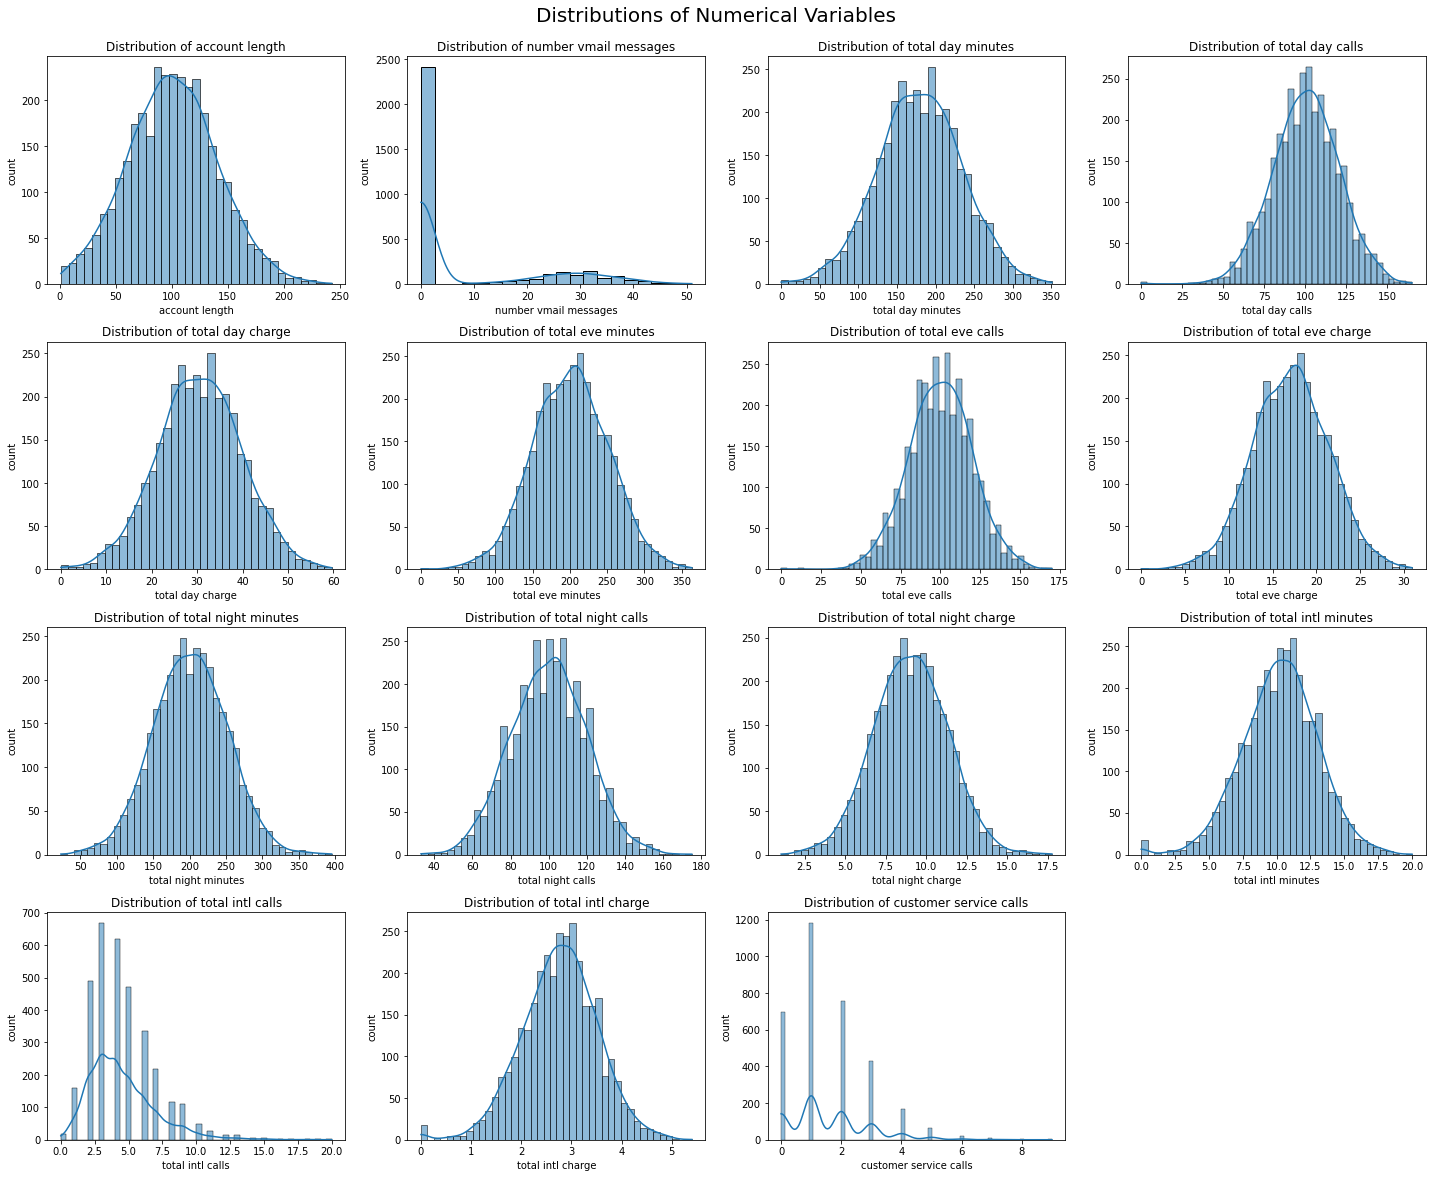

In [2170]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')

# Remove any empty subplots (if fewer than 16 features)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Add an overarching title to the figure
plt.suptitle('Distributions of Numerical Variables', fontsize=20, y=1.02)
plt.show()

For the distribution plots of the features above, all of them except customer service calls and number of voicemail messages have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.

### Outliers in numerical variables

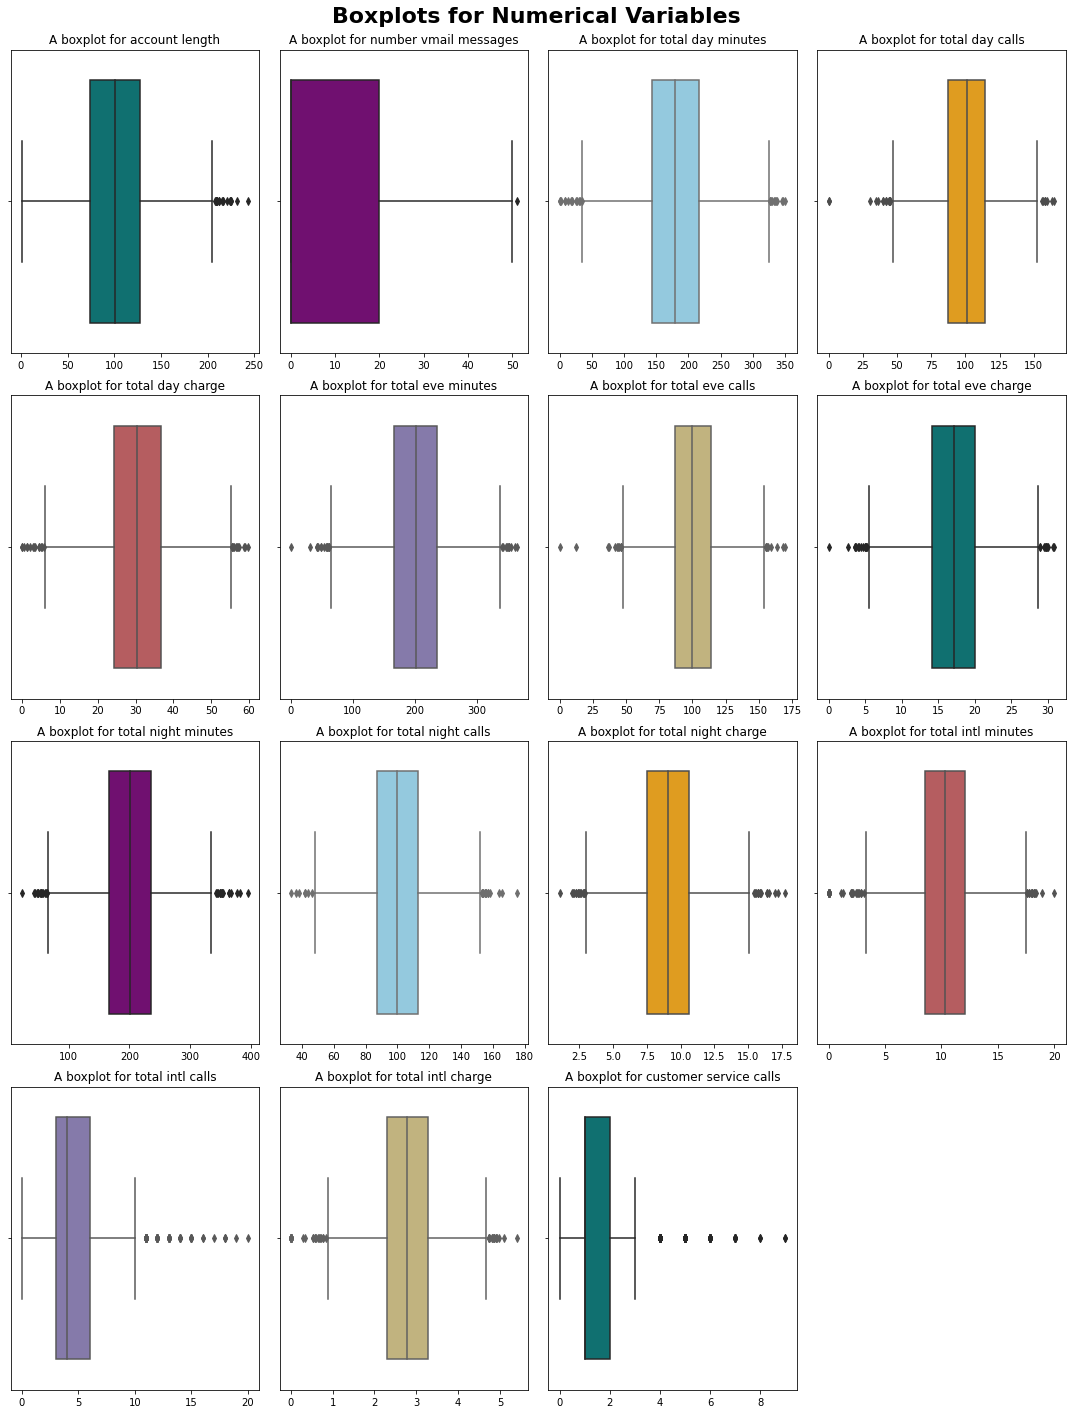

In [2171]:
plt.figure(figsize=(15, 20))  # Adjusted figure size to fit better on the screen

boxplot_colors = ["teal","purple", "skyblue", "orange", "#C44E52", "#8172B2", "#CCB974"]

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.boxplot(x=df[feature], color=boxplot_colors[i % len(boxplot_colors)])  # Plotting boxplot and cycling through colors
    plt.title(f'A boxplot for {feature}')
    plt.xlabel('')  # Keeping x-axis label empty
    plt.ylabel('')  # Keeping y-axis label empty
    plt.tight_layout()  # Adjusting layout for each subplot

plt.rcParams["figure.dpi"] = 150  # Adjusted DPI for better on-screen fit
plt.suptitle('Boxplots for Numerical Variables\n', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95)  # Adjusting spacing for title
plt.show()

The above boxplots confirm that there are lot of outliers in these variables.

In [2172]:
#Function to remove outliers
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print(df.shape)

(3169, 20)


## Exploratory data analysis

In this section,we explore the relationship or association between two variables in the dataset

What is the relationship between area codes and customer churn

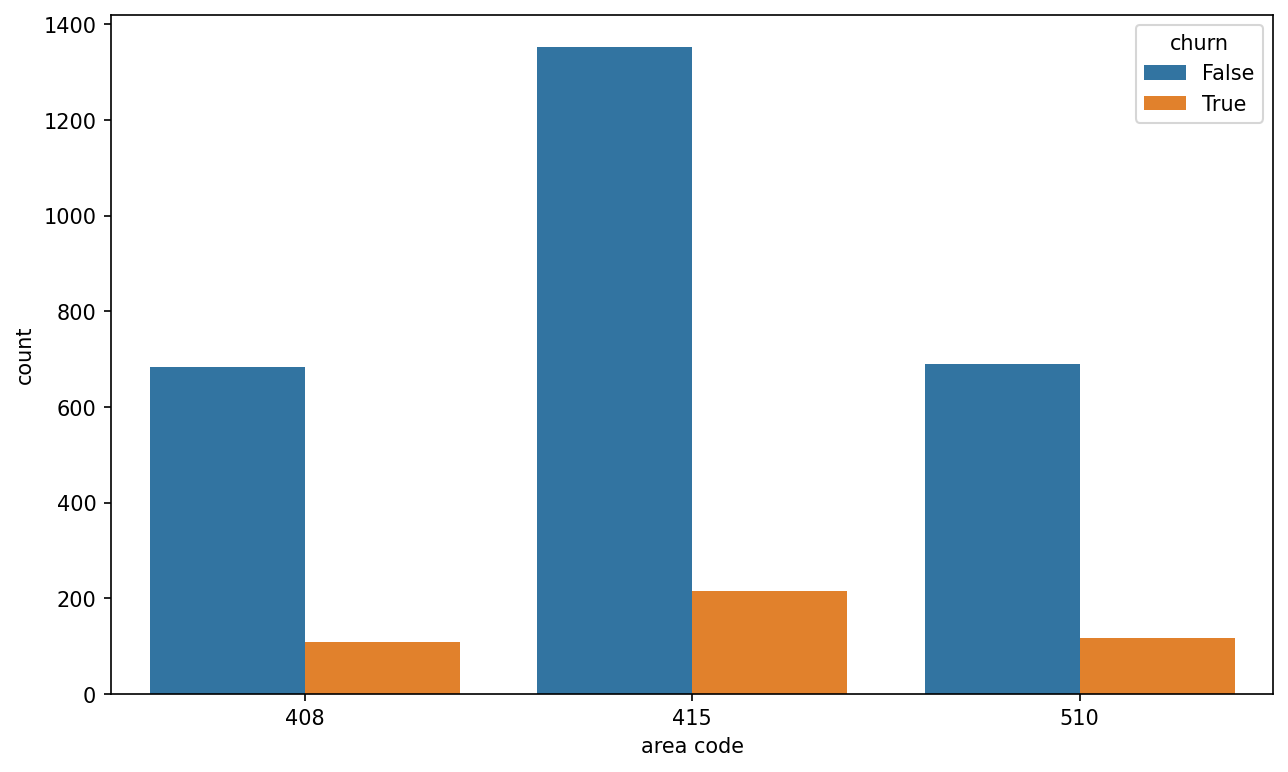

In [2173]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='area code', hue='churn');

Area code 415 has a higher customer base and also a higher churn number.

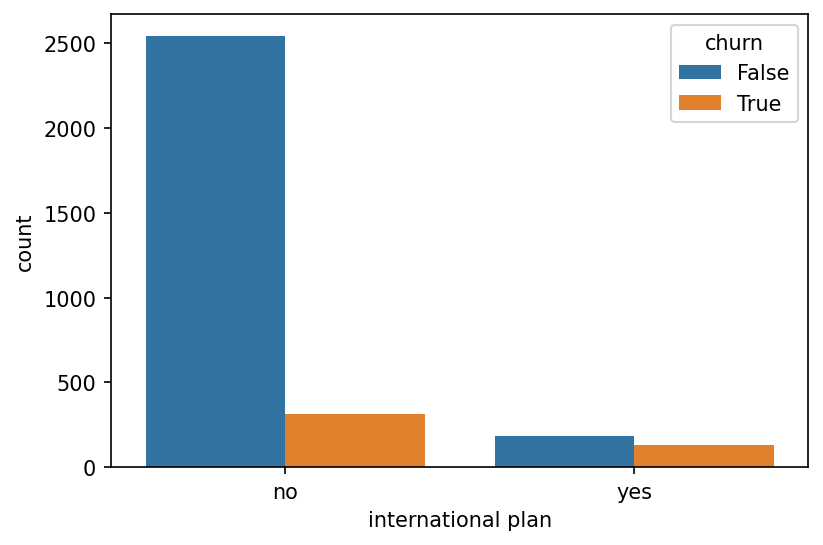

In [2174]:
df['international plan'].value_counts()
sns.countplot(data=df, x='international plan', hue='churn');

The majority of customers who churned did not have an international plan.

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

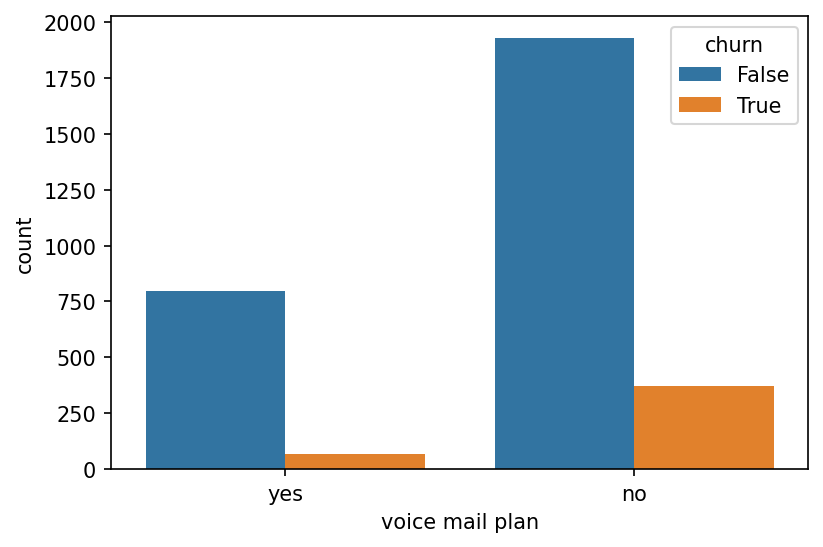

In [2175]:
sns.countplot(data = df, x='voice mail plan', hue='churn')

Customers without a voice mail plan have a higher churn rate compared to those with a voice mail plan.

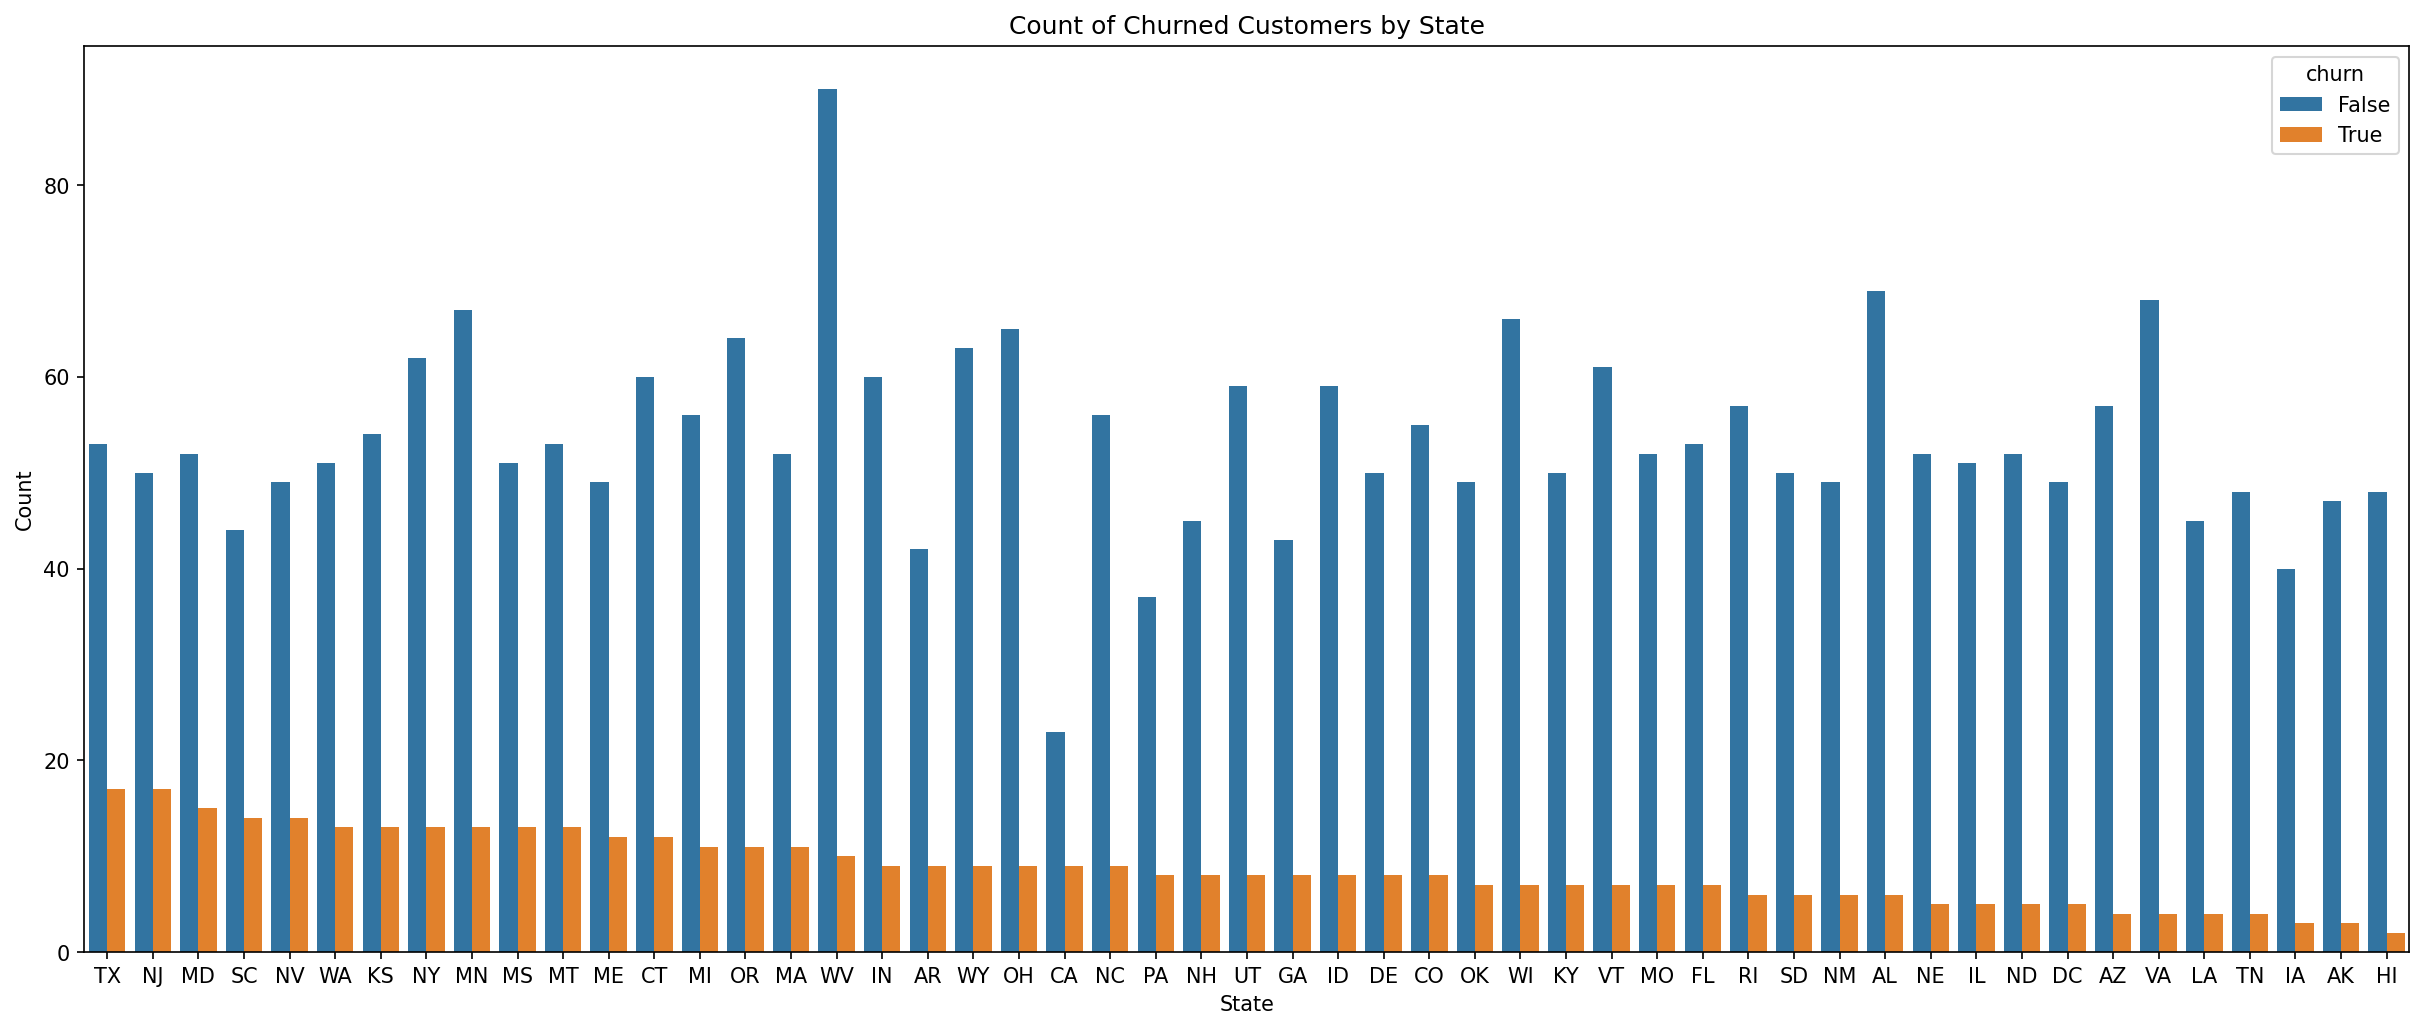

In [2176]:
plt.figure(figsize=(20, 8))
state_counts = df[df['churn'] == 1]['state'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='state', hue='churn', order=state_counts.index)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Churned Customers by State')
plt.show()

MD, TX, NJ. MI and NY have the highest number of churned customers.

## Data preparation

Look at the target variable

In [2177]:
#show frequency of unique values in churn
df.churn.value_counts()

False    2727
True      442
Name: churn, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

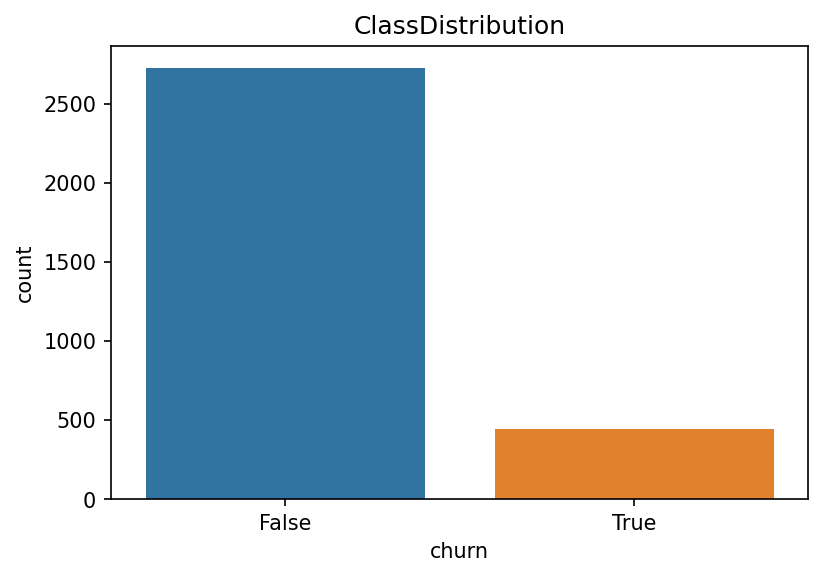

In [2178]:
sns.countplot(x='churn', data=df)
plt.title('ClassDistribution')
plt.show

The graph shows we have data imbalance. To correct this we will apply SMOTE to our data before modeling.

The values of target variable are in boolean format. lets change them to numerical.

In [2179]:
#Converting churn values to numerical
df['churn'] = df['churn'].map({False : 0, True : 1}).astype('int')

#display data information to check if churn has changed to numerical value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3169 non-null   object 
 1   account length          3169 non-null   int64  
 2   area code               3169 non-null   int64  
 3   international plan      3169 non-null   object 
 4   voice mail plan         3169 non-null   object 
 5   number vmail messages   3169 non-null   int64  
 6   total day minutes       3169 non-null   float64
 7   total day calls         3169 non-null   int64  
 8   total day charge        3169 non-null   float64
 9   total eve minutes       3169 non-null   float64
 10  total eve calls         3169 non-null   int64  
 11  total eve charge        3169 non-null   float64
 12  total night minutes     3169 non-null   float64
 13  total night calls       3169 non-null   int64  
 14  total night charge      3169 non-null   

### Checking for features that have high correlation

In [2180]:
correlation_matrix = df.corr()

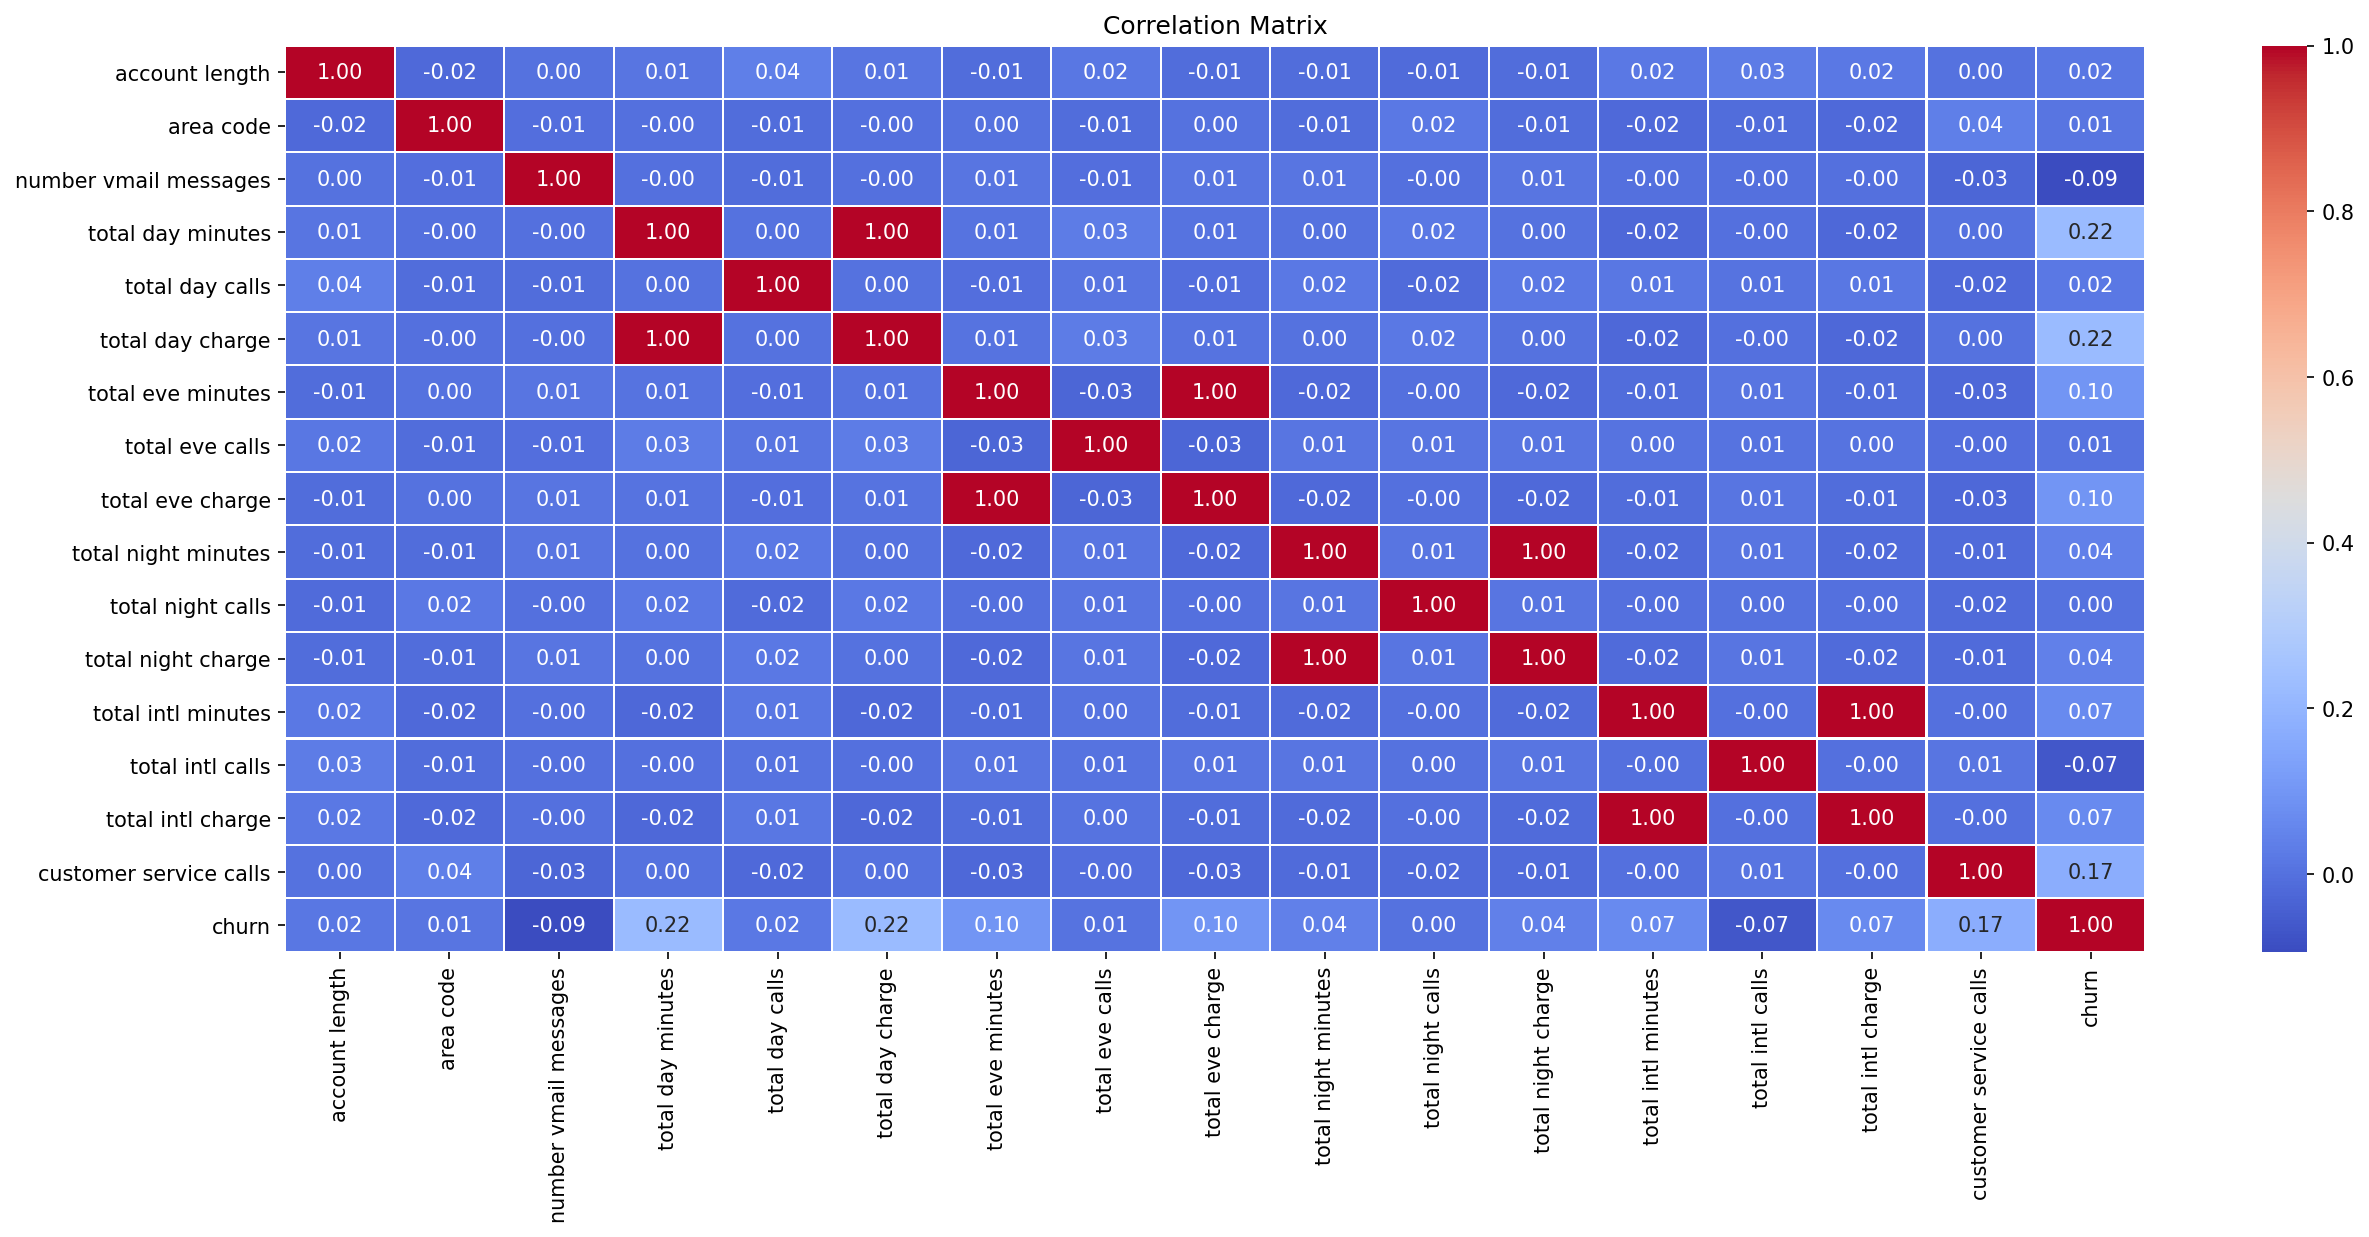

In [2181]:
#plot a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see that there are some features that are highly correlated like;

total today charge and total today minutes

total eve charge and total eve minutes

total night charge and total night minutes

total intl minutes and total intl charge

Multicollinearity occurs when two or more features in the dataset are highly correlated with each other, which can cause issues during modeling such as instability, overfitting, or inaccurate coefficient estimates. We will use L2 regularization by setting the penalty=l2 parameter in Logistic regression to address the issue.

In [2182]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining X and Y target variables

In [2183]:
# defining x and y
X = df.drop('churn', axis=1)
y = df['churn']

### Feature engineering categorical features

In [2184]:
categorical_features = ['state', 'international plan', 'voice mail plan', 'area code']
#Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#fit and transform OneHotEncoder to categorical features
X_categorical_encoded = ohe.fit_transform(X[categorical_features])

# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=ohe.get_feature_names(categorical_features))

#preview X_categorical_encoded_df
X_categorical_encoded_df

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3167,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Perform min-max scaling for numeric features

In [2185]:
numeric_features = ['number vmail messages','total day calls','total day charge','total eve calls',
                'total eve charge','total night calls','total night charge','total intl calls',
                'total intl charge','customer service calls']


In [2186]:
#Instantiate MinMaxscaler
scaler = MinMaxScaler()

#fit and transform scale to numeric features
X_numeric_scaled = scaler.fit_transform(X[numeric_features])

# Convert the scaled data back into a DataFrame 
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

#preview X_numeric_scaled_df
X_numeric_scaled_df


,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,0.2
1,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,0.2
2,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,0.0
3,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,0.4
4,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,0.6
...,...,...,...,...,...,...,...,...,...,...
3164,0.734694,0.296610,0.433327,0.717949,0.549981,0.353448,0.757531,0.5,0.480813,0.4
3165,0.000000,0.127119,0.667648,0.111111,0.344613,0.698276,0.467303,0.3,0.462754,0.6
3166,0.000000,0.567797,0.510392,0.136752,0.792299,0.422414,0.469508,0.5,0.738149,0.4
3167,0.000000,0.533898,0.613574,0.358974,0.365228,0.818966,0.294636,0.9,0.182844,0.4


In [2187]:
# Concatenate the encoded categorical features and scaled numeric features
X_encoded_scaled = pd.concat([X_categorical_encoded_df, X_numeric_scaled_df], axis=1)
X_encoded_scaled

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,0.2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,0.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,0.4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.734694,0.296610,0.433327,0.717949,0.549981,0.353448,0.757531,0.5,0.480813,0.4
3165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.127119,0.667648,0.111111,0.344613,0.698276,0.467303,0.3,0.462754,0.6
3166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.567797,0.510392,0.136752,0.792299,0.422414,0.469508,0.5,0.738149,0.4
3167,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.533898,0.613574,0.358974,0.365228,0.818966,0.294636,0.9,0.182844,0.4


In [2188]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=42)

Since our target feature "churn" has class imbalance , we will use SMOTE techniqueis where synthetic samples are generated for the minority class.

In [2189]:
# Apply SMOTE for oversampling 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the resampled class distribution
y_train_smote.value_counts()

1    2191
0    2191
Name: churn, dtype: int64

## Modeling

We will have a baseline model which is  Logistic regression 

In [2190]:
# Initialize logistic regression with L2 regularization
logreg = LogisticRegression(penalty='l2')

# Fit the model
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [2191]:
# Make predictions on training data
y_pred_train = logreg.predict(X_train_smote)
y_test_pred = logreg.predict(X_test)

### Check accuracy score

Compare the train-set and test-set accuracy to check for overfitting.

In [2192]:
# Calculate accuracy score of train_set and test_set
accuracy_train = accuracy_score(y_train_smote, y_pred_train)
print('Accuracy train:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy test:', accuracy_test)


Accuracy train: 0.7937015061615701
Accuracy test: 0.7649842271293376


The training-set accuracy score is 0.7937 while the test-set accuracy to be 0.7649. These two values are quite comparable. So, there is no question of overfitting.

In [2193]:
# Other evaluation metrics
precision = precision_score(y_test, y_test_pred)
print('Precision:', precision)
recall = recall_score(y_test, y_test_pred)
print('Recall:', recall)
f1_score = f1_score(y_test, y_test_pred)
print('F1 score:', f1_score)

Precision: 0.35911602209944754
Recall: 0.6632653061224489
F1 score: 0.4659498207885304


### Interpretation


Low Precision (35.9%): The model has a tendency to incorrectly predict negative cases as positive, leading to a high number of False Positives.

Moderate Recall (66.3%): The model is relatively good at finding true positives but still misses a significant portion.

Moderate F1 Score (46.6%): The model's overall balance between precision and recall is moderate but indicates room for improvement, especially if False Positives or False Negatives have serious implications.

### Confusion matrix

In [2194]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[420 116]
 [ 33  65]]

True Positives(TP) =  420

True Negatives(TN) =  65

False Positives(FP) =  116

False Negatives(FN) =  33


<AxesSubplot:>

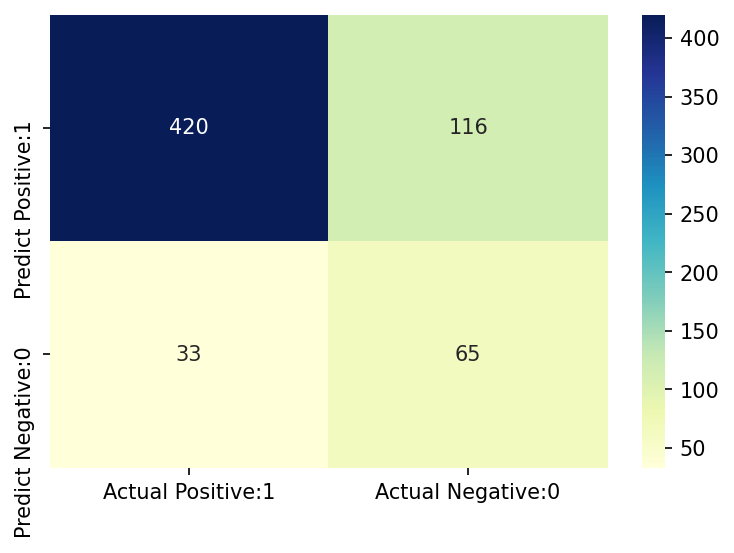

In [2195]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Interpretation:


High Recall: The model is good at identifying positive cases, as it correctly identifies 92.7% of them.

Moderate Precision: The model has a moderate precision of 78.3%, meaning that of all the instances it predicted as positive, about 78.3% were actually positive.

False Positives: The model has a relatively high number of false positives (116), indicating that it sometimes incorrectly predicts negative instances as positive.

False Negatives: With 33 false negatives, the model occasionally fails to identify positive instances.

The model shows strong recall but has a moderate precision, indicating it is better at identifying actual positives but sometimes at the cost of mistakenly labeling negatives as positives. 

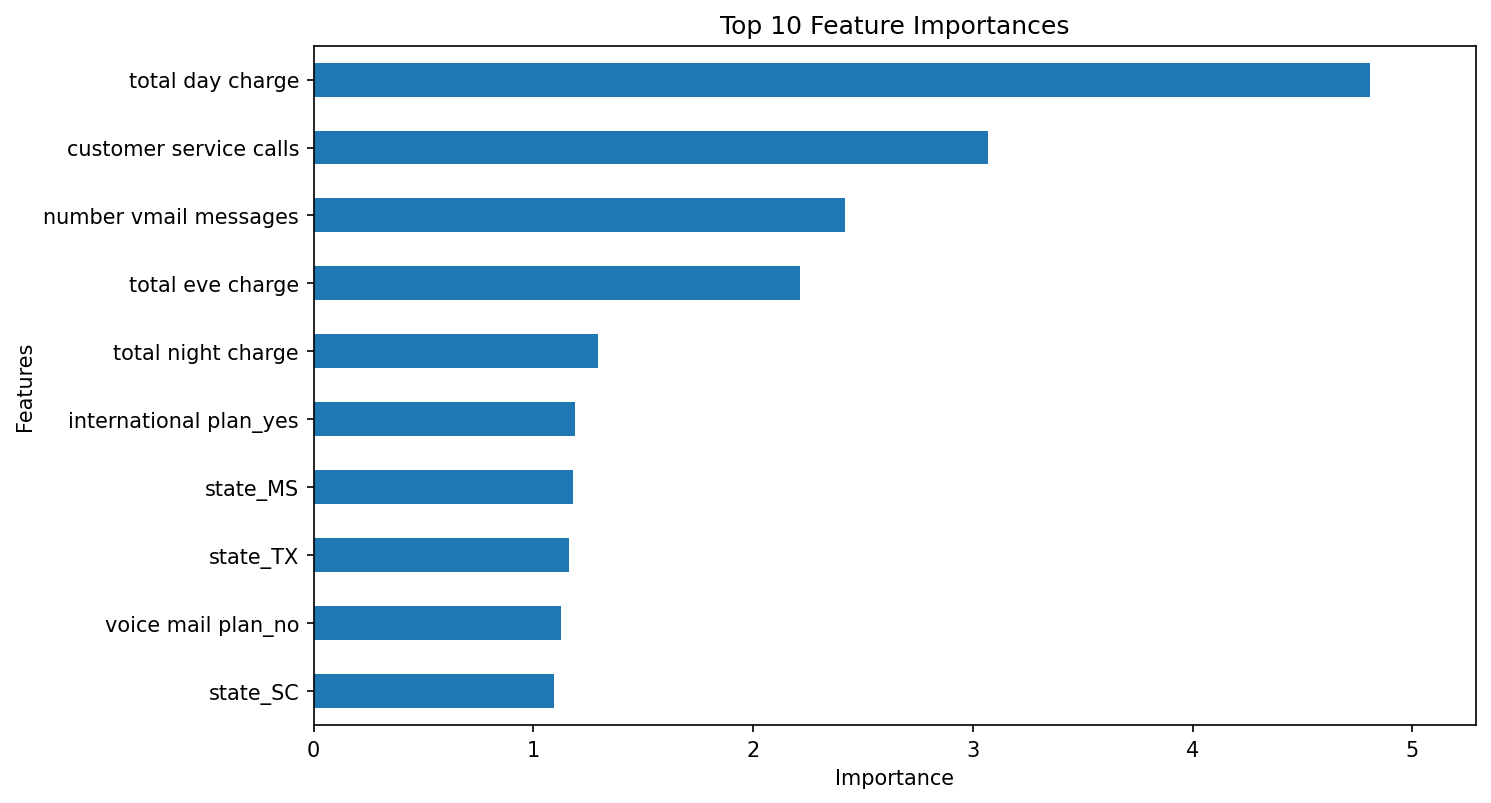

In [2196]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = X_train_smote.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

According to the model,total day charge, customer service calls,total eve charge are the top three most important features.

## Second model; Decision Tree Classifier

In [2197]:
#Instantiate DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=42)

#Fit on the training data
model2.fit(X_train_smote, y_train_smote)

#predict on the test set
y_train_pred2 = model2.predict(X_train_smote)
y_test_pred2 = model2.predict(X_test)


### Check accuracy score

Compare the train-set and test-set accuracy to check for overfitting.

In [2198]:
accuracy_train2 = accuracy_score(y_train_smote, y_train_pred2)
print('Accuracy train:', accuracy_train2)
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
print('Accuracy test:', accuracy_test2)

Accuracy train: 1.0
Accuracy test: 0.8643533123028391


Perfect Training Accuracy (1.0):

Overfitting: This often indicates that the model has learned the training data too well, potentially memorizing it rather than generalizing patterns.

Data Leakage: Ensure there's no data leakage, where information from the test set is inadvertently used during training.

Lower Test Accuracy (0.8643):

Generalization: This suggests the model might be struggling to generalize its learned patterns to new, unseen data.

Model Complexity: A complex model might be overfitting the training data, leading to poor performance on the test set.

In [2199]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       536
           1       0.56      0.61      0.58        98

    accuracy                           0.86       634
   macro avg       0.74      0.76      0.75       634
weighted avg       0.87      0.86      0.87       634



### Interpretation:


Class 0 Performance:

The model performs very well for class 0 (the negative class), with high precision, recall, and F1-score. This suggests that the model is very effective at correctly identifying and classifying instances of class 0.

Class 1 Performance:

The model's performance on class 1 (the positive class) is notably lower, with moderate precision and recall, leading to a moderate F1-score. This indicates that the model has some difficulty accurately predicting the positive class, with a significant portion of both false positives and false negatives.

Conclusion:

Imbalanced Performance: The model performs well on the majority class (class 0) but struggles with the minority class (class 1). This is a common issue in classification tasks with imbalanced data.

Potential Improvements: If the positive class is particularly important, you might consider methods to improve the model's performance on class 1, such as adjusting the decision threshold, using class weighting, or applying techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

### Confusion matrix

In [2200]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_test_pred2)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[488  48]
 [ 38  60]]

True Positives(TP) =  488

True Negatives(TN) =  60

False Positives(FP) =  48

False Negatives(FN) =  38


<AxesSubplot:>

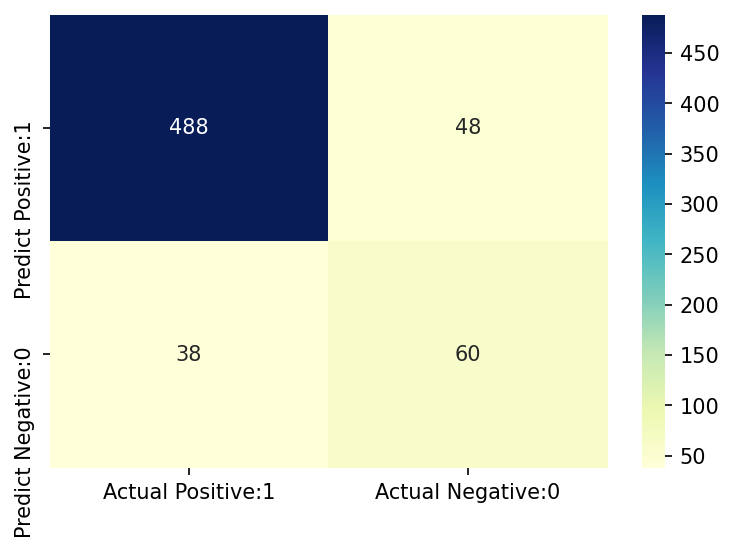

In [2201]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Interpretation:

High Accuracy: The model has an overall accuracy of 86.4%, meaning it correctly predicts the class for 86.4% of the instances.

High Precision: With a precision of 91.0%, the model is quite accurate in predicting positive instances—91.0% of the predicted positives are true positives.

High Recall: The model also has a high recall of 92.8%, meaning it correctly identifies 92.8% of the actual positives.

Low False Positive Rate: The model has a relatively low number of false positives (48), meaning it doesn't often incorrectly label negatives as positives.

Moderate False Negative Rate: With 38 false negatives, the model occasionally fails to identify positive instances, but the rate is relatively low.

The model demonstrates strong performance overall, with high precision and recall, indicating that it is both accurate in its positive predictions and effective at identifying true positives. The low number of false positives and false negatives suggests that the model is well-balanced and suitable for tasks where both types of errors are important to minimize. This performance could be particularly useful in scenarios where the costs of false positives and false negatives are high.

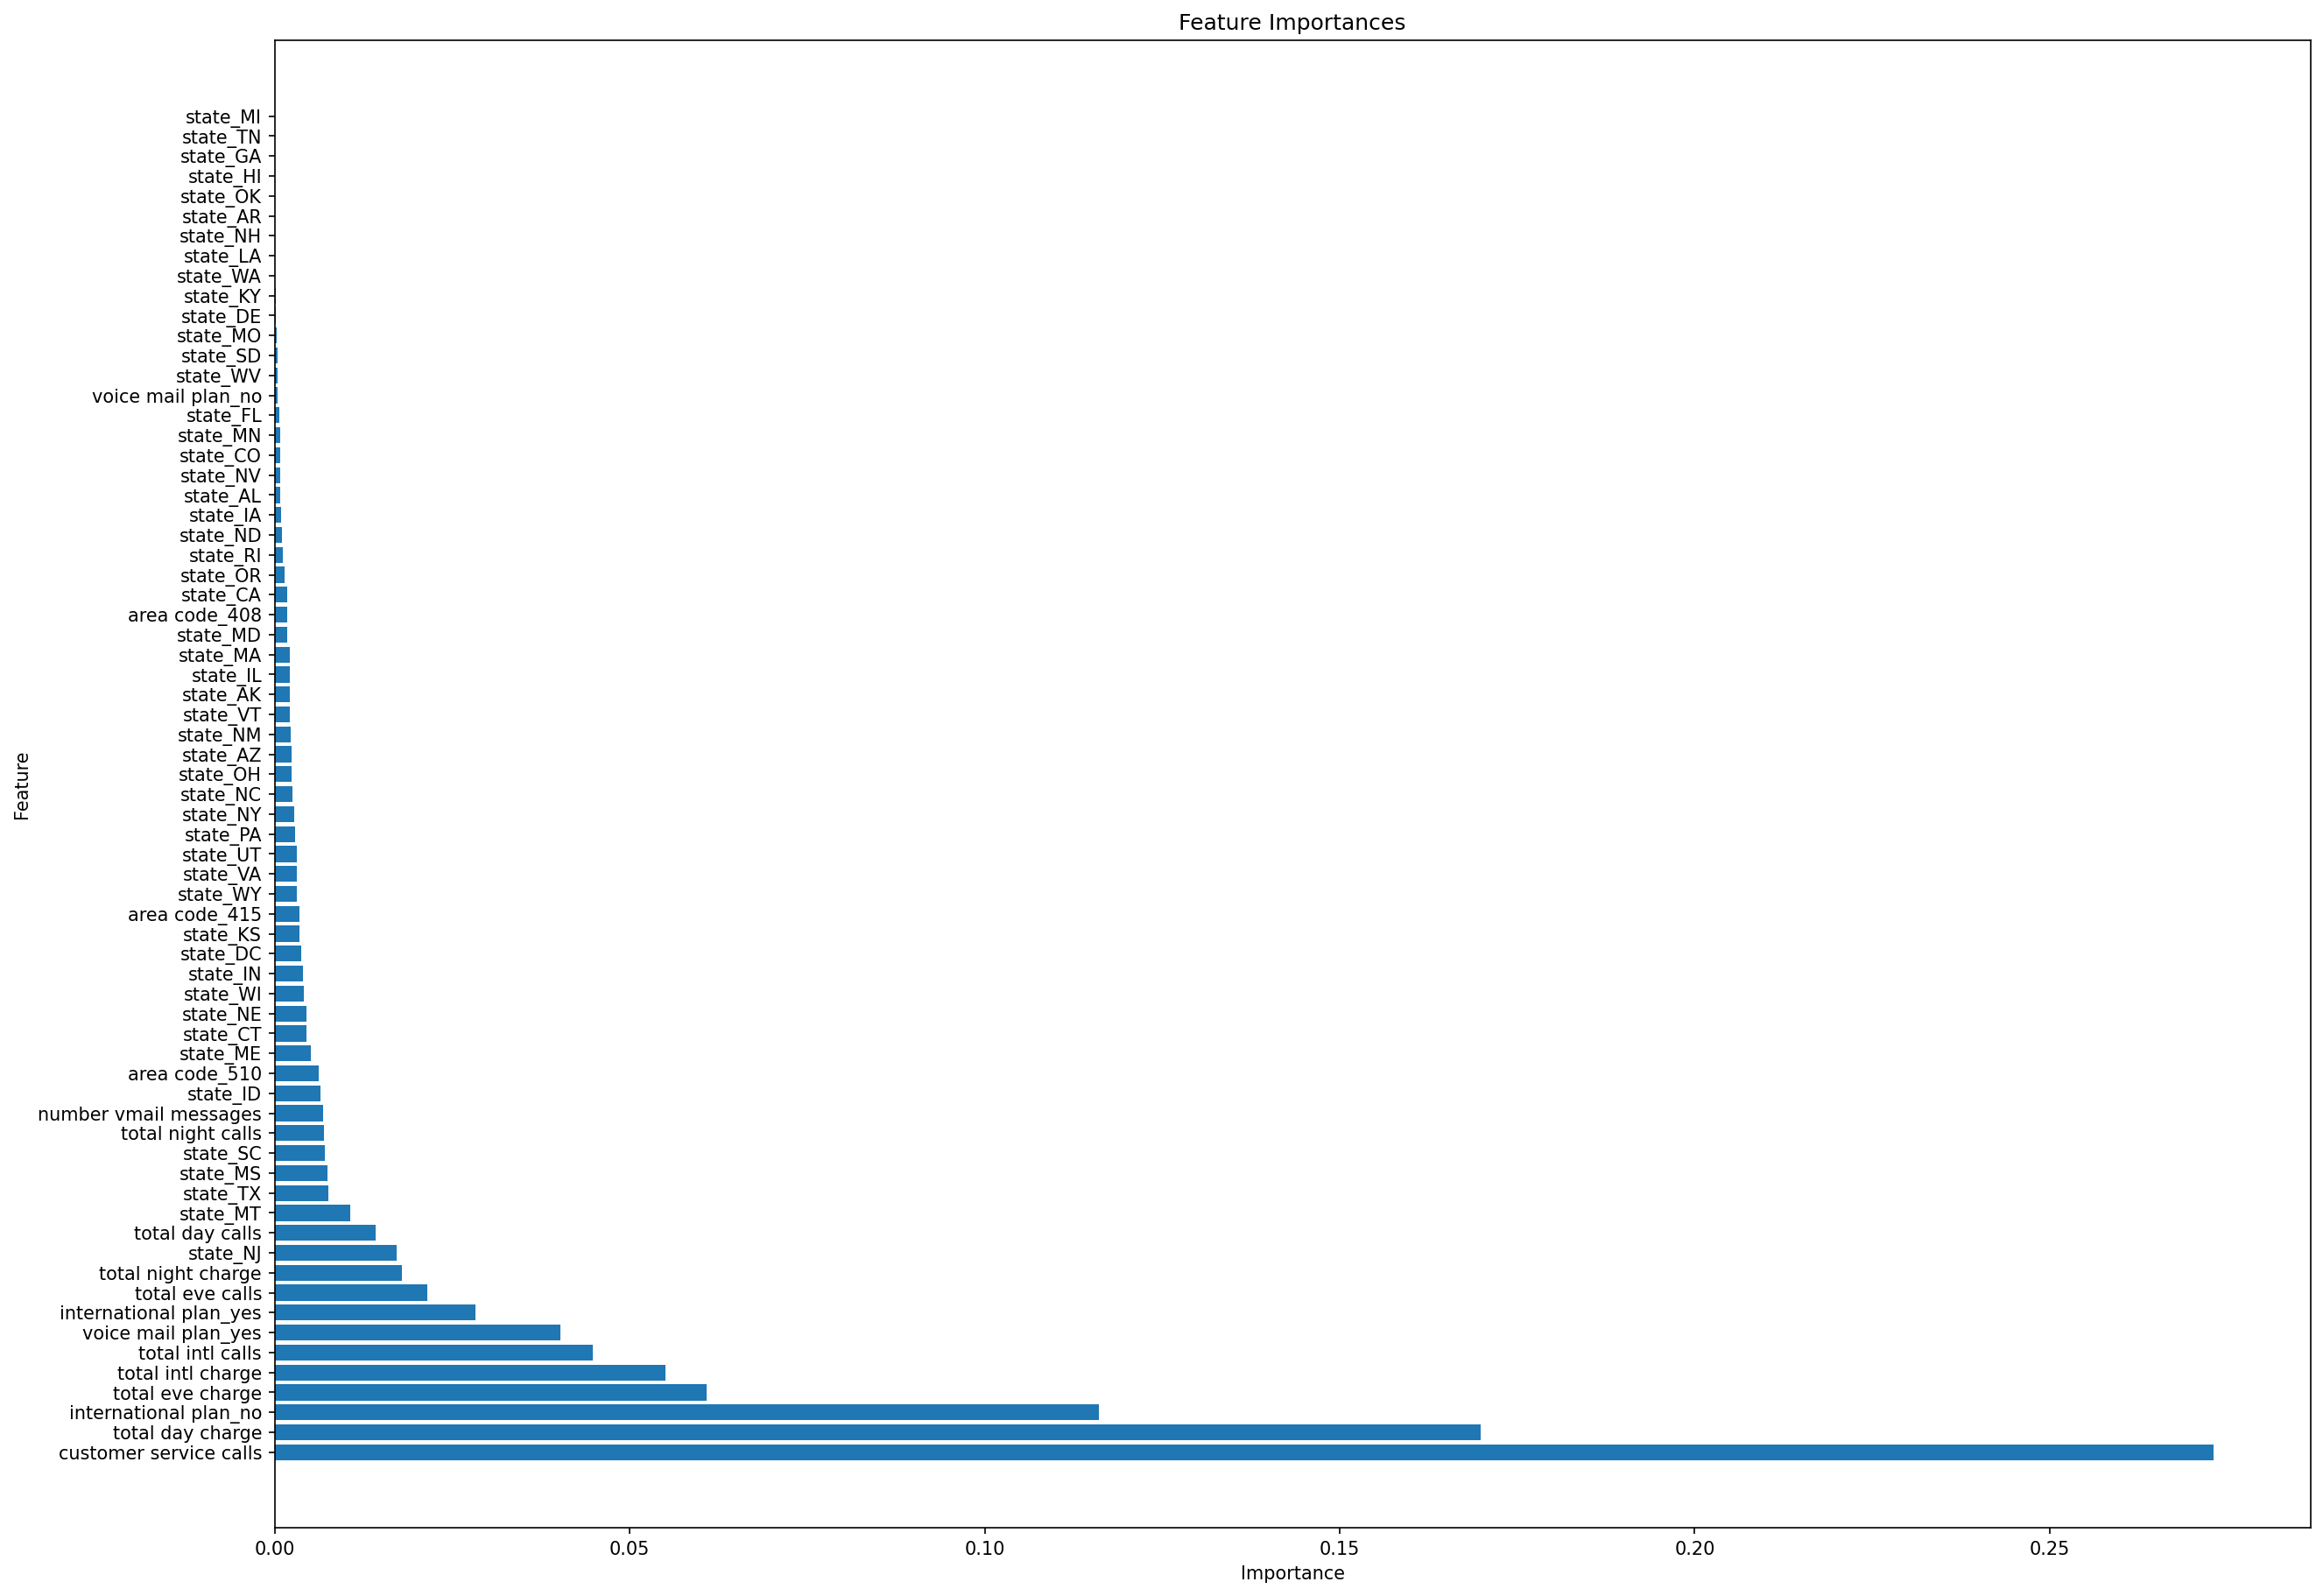

In [2202]:
# Get feature importances
importances = model2.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train_smote.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(20, 15))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

According to the model, customer service calls, total day charge, international plan_no are the top three most important features.

## Model evaluation

###  Models Comparison

Let's select the best model from the two models above by evaluating their perfomance using the ROC curve and Recall sore .

First we use ROC curve

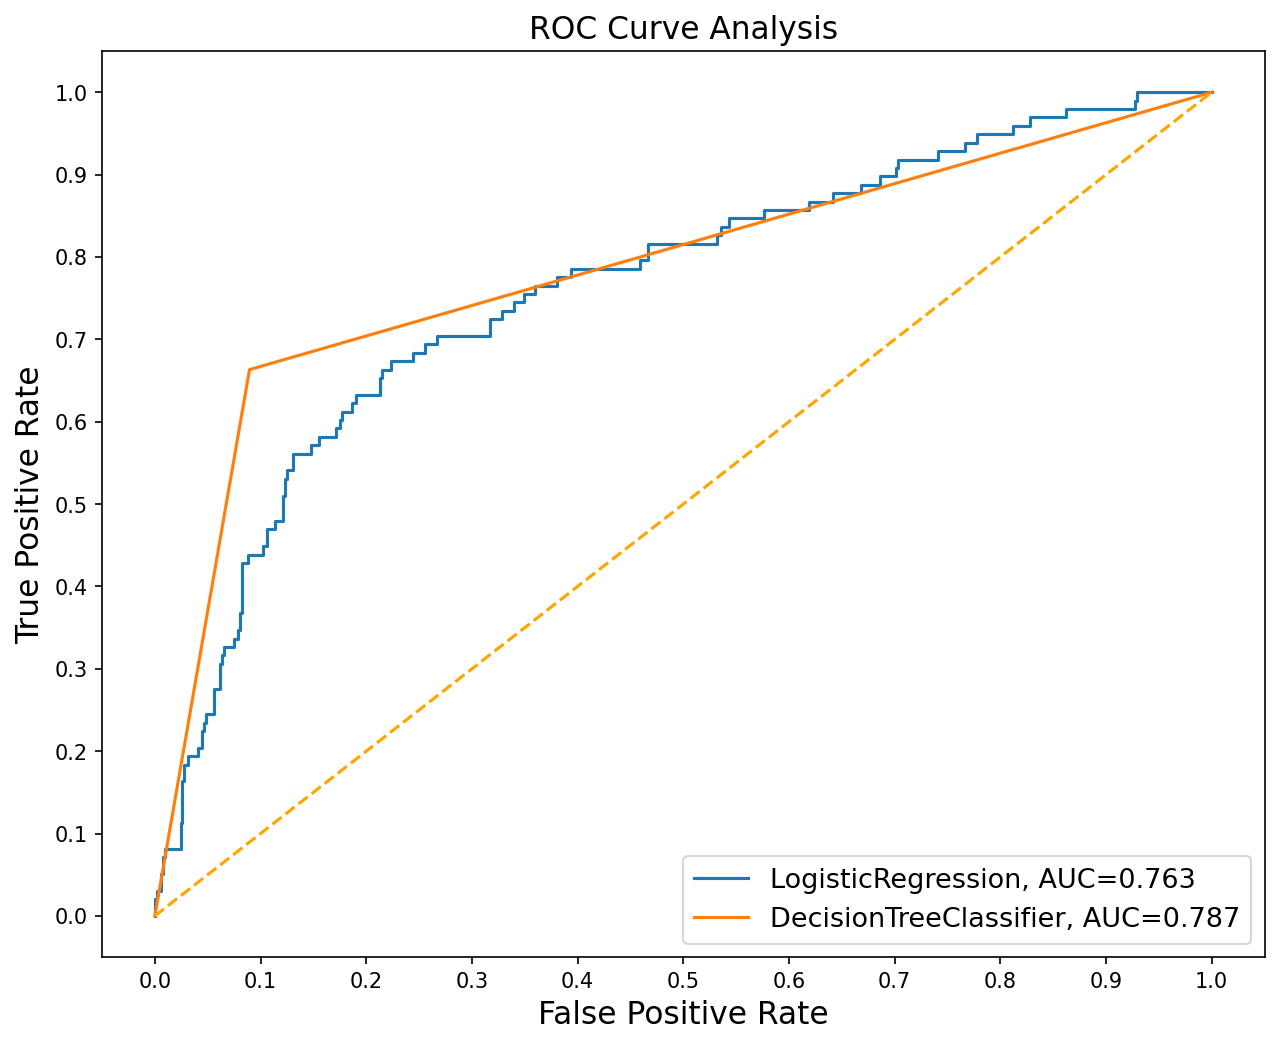

In [2203]:
classifiers = [LogisticRegression(),
               DecisionTreeClassifier()]
               


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The ROC curve analysis shows that the DecisionTreeClassifier  has the highest AUC score of 0.775, while the LogisticRegression has AUC score of 0.763.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.

Recall Score

In [2204]:
classifiers = [LogisticRegression(),
               DecisionTreeClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table

,recall
classifiers,
LogisticRegression,0.663265
DecisionTreeClassifier,0.642857


The results table shows that the LogisticRegression has the highest recall score of 0.66, and DecisionTreeClassifier has the  recall score of 0.65.

A higher recall score indicates that the model is more effective at correctly identifying positive instances. This can be particularly useful in scenarios where the cost of false negatives (incorrectly predicting a customer will not churn) is high, such as in customer churn prediction.

Looking at their log loss

In [2205]:
# Calculate log loss for each model
logloss_model1 = log_loss(y_test, y_test_pred)
logloss_model2 = log_loss(y_test, y_test_pred2)

# Print the log losses
print('Log Loss - Model 1:', logloss_model1)
print('Log Loss - Model 2:', logloss_model2)




# Choose the model with the lowest log loss
best_model = None
lowest_logloss = float('inf')  # Initialize with a very high value

if logloss_model1 < lowest_logloss:
    best_model = model
    lowest_logloss = logloss_model1

if logloss_model2 < lowest_logloss:
    best_model = model2
    lowest_logloss = logloss_model2



print('Best Model:', best_model.__class__.__name__)
#print('Best Model:', best_model._)

Log Loss - Model 1: 8.117303527040368
Log Loss - Model 2: 4.685131152427395
Best Model: DecisionTreeClassifier


From the above analysis, we see that DecisionTreeClassifier  has the least Log loss of 4.68. This is good for a model.

Based on the evaluation of the models using recall scores , ROC AUC and Log loss it is observed that the DecisionTreeClassifier has shown promising performance. To further improve its performance, We then have to tune the hyperparameters to try reduce any chances of overfitting. We will perform cross validation in this case.

## Tuning DecisionTreeClassifier

In [2206]:

model2_cv = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model2_cv, X_train_smote, y_train_smote, cv=5)

# Output the cross-validation results
print("Cross-Validation Accuracy: ")
print("Mean:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Fit the best model on the resampled training data
model2_cv.fit(X_train_smote, y_train_smote)

# Make predictions on training and test data
y_train_pred_best = model2_cv.predict(X_train_smote)
y_test_pred_best = model2_cv.predict(X_test)

# Calculate evaluation metrics
accuracy_train_best = accuracy_score(y_train_smote, y_train_pred_best)
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)

# Print the accuracy results
print("Accuracy (Train):", accuracy_train_best)
print("Accuracy (Test):", accuracy_test_best)

Cross-Validation Accuracy: 
Mean: 0.9007333531185079
Standard Deviation: 0.012182322240855647
Accuracy (Train): 0.9545869465997262
Accuracy (Test): 0.9069400630914827


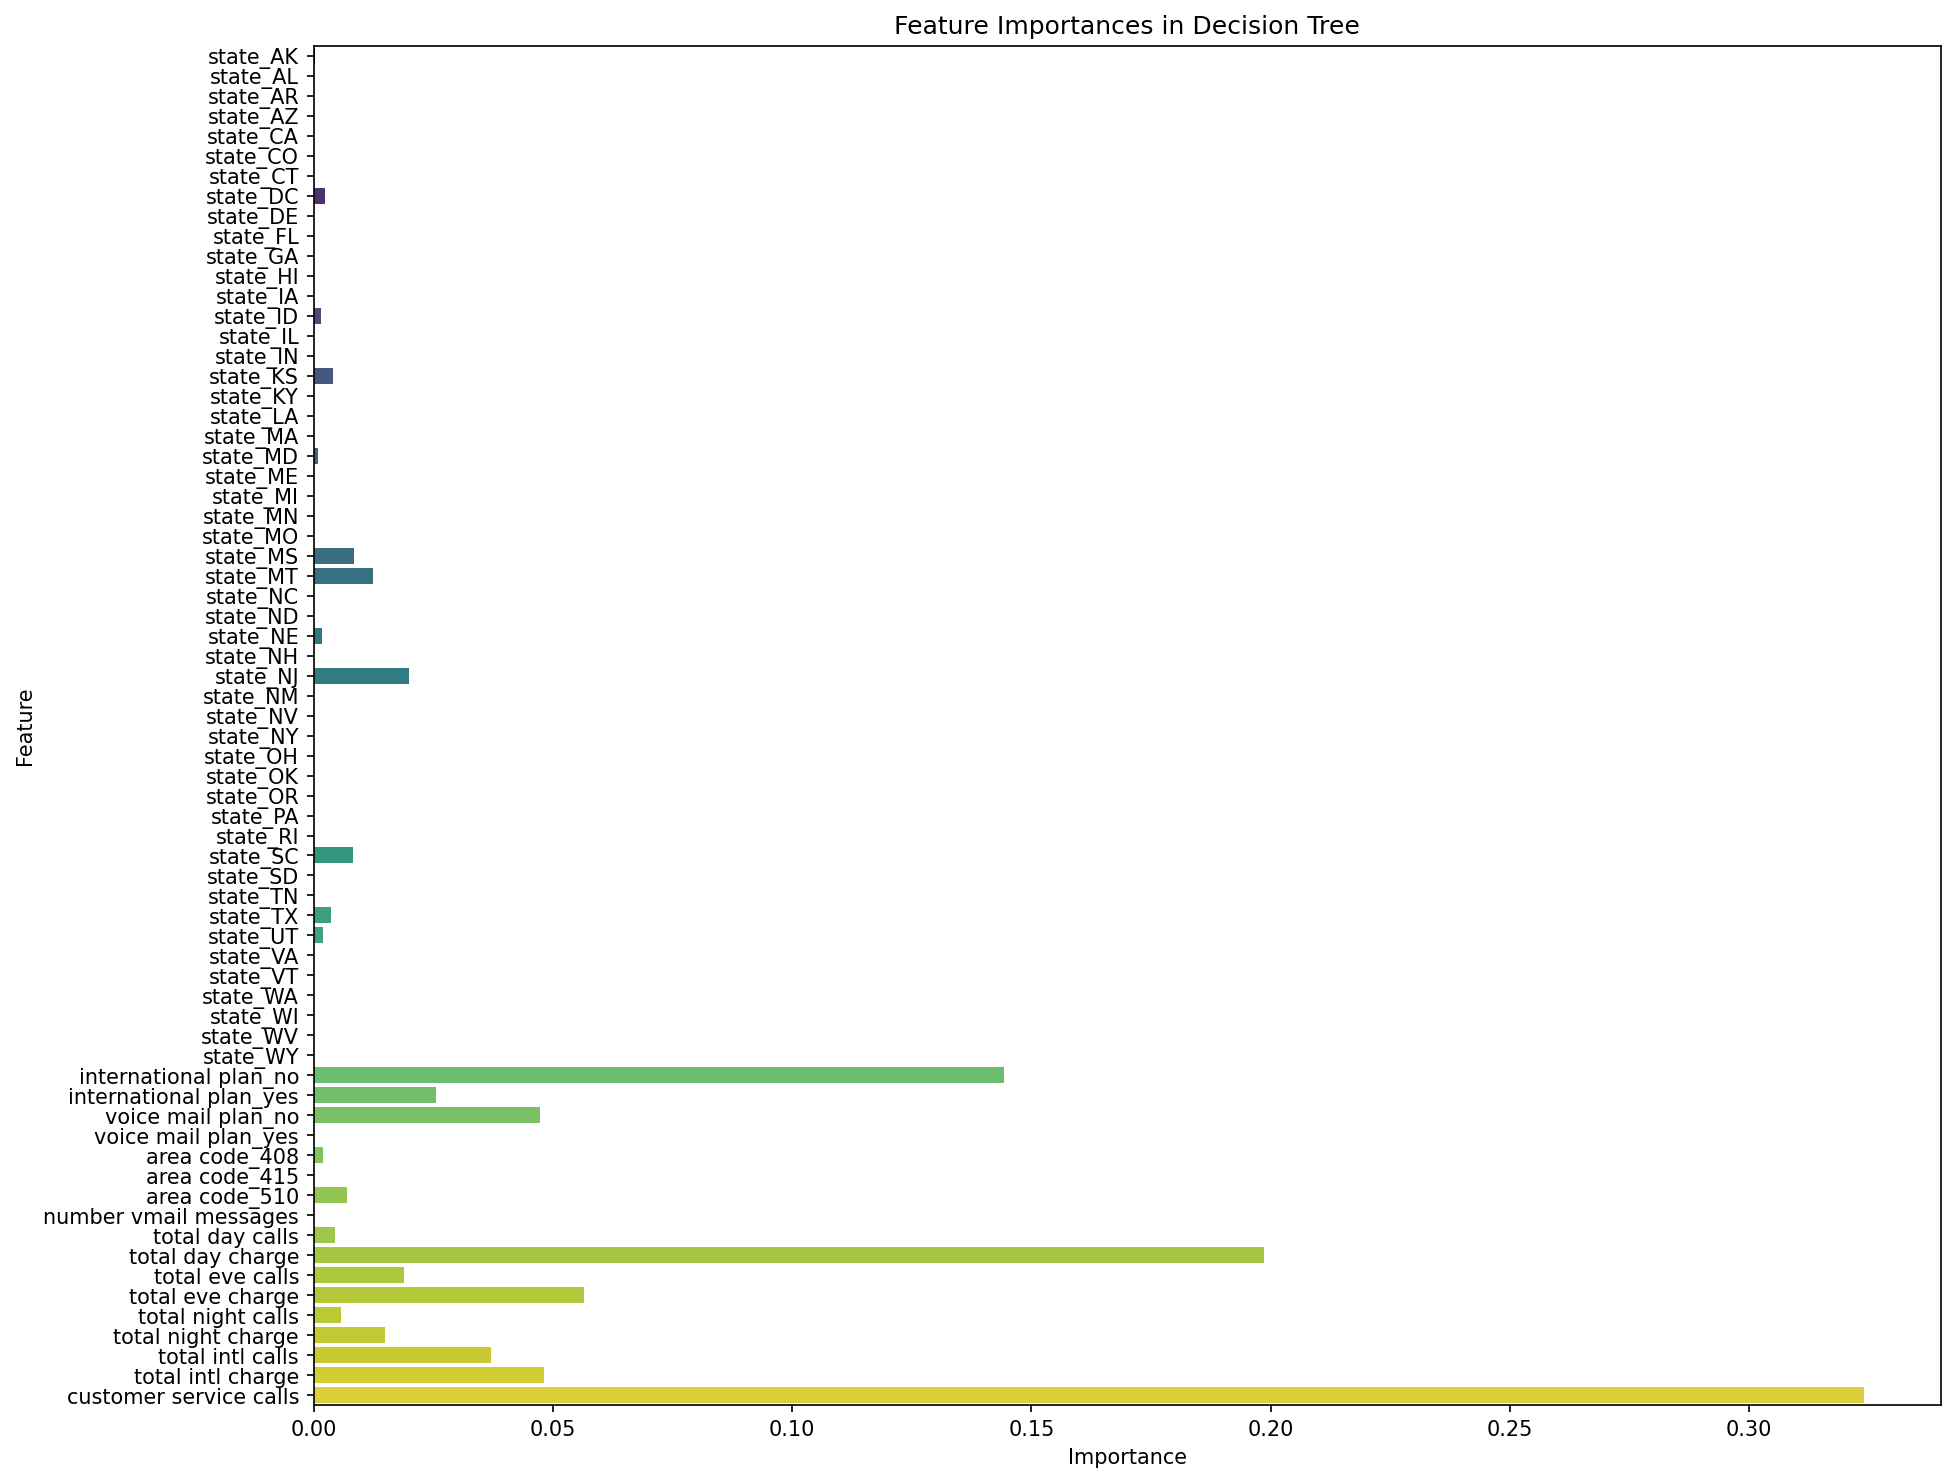

In [2207]:
# Get feature importances
feature_importances = model2_cv.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with your feature names
    'Importance': feature_importances
})

# Sort the features by importance
#feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Set the size of the plot
plt.figure(figsize=(14, 12))

# Create the bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')

# Add titles and labels
plt.title('Feature Importances in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()

# Display the feature importances
#print(feature_importances_df)

The graph above shows customer service calls, total day charge, international plan, number of voice mail messages, total evening charge, to be among the top important features in this model.

We can see that the model is performing well, there is neither underfitting nor overfitting. The accuracy level is overally good. This will be our final model

## Recommendations

1.Improve customer service quality and reduce the number of customer service calls. Enhance training programs for customer service representatives to ensure prompt and effective resolution of customer issues, leading to higher customer satisfaction and reduced churn.

2.Evaluate the pricing structure for day, evening, night, and international charges. Consider adjusting pricing plans or introducing discounted packages to address the higher charges associated with customers who churn.

3.Invest in improving international connectivity by offering more international plans, offering free international calls, and providing better international service quality.

4.Improve customer retention by offering loyalty programs, free or discounted services, and incentives for repeat business. This can help retain customers and improve customer loyalty.

5.Monitor and analyze customer churn patterns to identify trends and areas for improvement. This will help in making data-driven decisions to optimize customer retention and improve customer satisfaction.

6.Enhance the value proposition of the voicemail plan to increase adoption among customers. Highlight the benefits and convenience of voicemail services, and consider offering additional features or discounts to encourage customers to sign up.

7.Educate the customers on the benefits of the voice mail plans

## Conclusion


In conclusion, the analysis of the customer churn in SyriaTel has provided clear knowledge on the factors that leads to churning of the customers as well as valuable insights into the customer behaviors.

The models have provided a clear predictive power on customers churn as well as identifying important features that greatly influence customer retention.